<div style="background-color: #431170; padding: 20px;">
<img src="https://macss.berkeley.edu/wp-content/uploads/2023/09/UCBMaCSS_Logo_2Color_Reverse_TaglineB.png" alt="MaCSS" width="300">
</div>

# **Assignment 2:** Data Simulation & Regression 💜

[wdtmacss@berkeley.edu](mailto:wdtmacss@berkeley.edu)\
**Computational Social Science 1A**\
[Human Psychology and Social Technologies](https://classes.berkeley.edu/content/2024-fall-compss-214a-001-lec-001) 
Fall 2024\
UC Berkeley [Masters in Computational Social Science](https://macss.berkeley.edu/about/)

👩🏾‍🔬🧑‍💻👩🏻‍💻👨🏿‍💻🔬

---
**Assignment Instructions:** 

*  Take a copy of this notebook and answer the questions in Sections 2, 3, and 4. Add as many code and markdown cells as you need within those sections.
*  Answer the External Resources question in Section 5.
*  Submit your completed notebook through gradescope.  

**Due date:** 10/03/2024 (before midnight Pacific time)

**Grading guidelines** are available [here](https://bcourses.berkeley.edu/courses/1538139/files?preview=89785268).

**The AI model usage policy** is available [here](https://bcourses.berkeley.edu/courses/1538139/files?preview=89785318).

---

# **Section 1**: Data simulation Engine
The code in this section provides the tools you need to simulate data given a set of `simulation_parameters` that you provide. You **do not need to edit this section**.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# example set of simulation parameters
default_simulation_parameters = {
    "num_employees_per_company": 50,
    "satisfaction_variance": 1, 
    "data_collection_start_date": pd.to_datetime("2022-01-01"),
    "data_collection_end_date": pd.to_datetime("2023-12-31"),
    "remote_work_onset_date": pd.to_datetime("2023-01-01"),
    "remote_work_treatment_effect": 2,
    "satisfaction_levels": {"Rubicon":5.2, "Giggle": 6.1}
}

In [3]:
def simulate_data(simulation_parameters):
    data = []
    
    # create the date range for data collection
    dates = pd.date_range(
        start=simulation_parameters["data_collection_start_date"], 
        end=simulation_parameters["data_collection_end_date"], 
        freq='W' # weekly intervals between start and end
    )

    # set number of employees per company
    num_employees = simulation_parameters["num_employees_per_company"]
    for company in ['Rubicon', 'Giggle']:

        # company satisfaction parameters
        satisfaction_mean = simulation_parameters["satisfaction_levels"][company]
        satisfaction_variance = simulation_parameters["satisfaction_variance"]

        # simulate data collection
        for date in dates:
            time_at_company = (date - simulation_parameters["data_collection_start_date"]).days
            for i in range(num_employees):
                employee_age = np.random.randint(18, 60)
                satisfaction = np.random.normal(
                    satisfaction_mean,
                    satisfaction_variance
                )

                # treatment effect
                if date > simulation_parameters["remote_work_onset_date"]:
                    if company == "Giggle":
                        satisfaction += simulation_parameters["remote_work_treatment_effect"] 
                
                # save the data in a useful format
                datapoint = {
                    "date": date, 
                    "company": company,
                    "satisfaction": satisfaction,
                    "employee_id": f"{company[0]}{i}", # create a fake employee id by combining the company name initial letter and the loop index variable
                    "time_at_company": time_at_company,
                    "employee_age": employee_age
                } 
                data.append(datapoint)
    return pd.DataFrame(data)

In [4]:
df_default = simulate_data(default_simulation_parameters)

In [5]:
df_default.sample(n=10)

,date,company,satisfaction,employee_id,time_at_company,employee_age
5399,2022-01-16,Giggle,5.775930,G49,15,24
9093,2023-06-18,Giggle,8.702924,G43,533,59
6141,2022-05-01,Giggle,5.763872,G41,120,38
709,2022-04-10,Rubicon,5.415126,R9,99,39
4514,2023-09-24,Rubicon,4.108395,R14,631,44
1084,2022-05-29,Rubicon,4.308541,R34,148,29
6444,2022-06-12,Giggle,7.072687,G44,162,53
5726,2022-03-06,Giggle,7.602060,G26,64,45
7756,2022-12-18,Giggle,6.752690,G6,351,19
7845,2022-12-25,Giggle,7.885593,G45,358,39


---

# **Section 2** Alternative Simulation Parameters 
In this section, your goal is to demonstrate that you understand simulate data using different sets of parameters. The section will start with one example, followed by two assignment questions that you should fill out.

## 2.1 Example
**Example instruction**: simulate a dataset in which the onset date for the remote work treatment is takes place in March    


In [6]:
# take a copy of the default simulation parameters dictionary
march_onset_parameters = default_simulation_parameters.copy()

# overwrite the parameter for data collection onset within in our new copy of the parameters
march_onset_parameters["remote_work_onset_date"] = pd.to_datetime("2023-03-01")

In [7]:
# look at the updated parameters 
march_onset_parameters

{'num_employees_per_company': 50,
 'satisfaction_variance': 1,
 'data_collection_start_date': Timestamp('2022-01-01 00:00:00'),
 'data_collection_end_date': Timestamp('2023-12-31 00:00:00'),
 'remote_work_onset_date': Timestamp('2023-03-01 00:00:00'),
 'remote_work_treatment_effect': 2,
 'satisfaction_levels': {'Rubicon': 5.2, 'Giggle': 6.1}}

In [8]:
# simulate data with new parameters
march_onset_df = simulate_data(march_onset_parameters)

In [9]:
# look at the data
march_onset_df.sample(5)

,date,company,satisfaction,employee_id,time_at_company,employee_age
2969,2023-02-19,Rubicon,5.530609,R19,414,28
4860,2023-11-12,Rubicon,5.838075,R10,680,21
8102,2023-02-05,Giggle,6.604083,G2,400,47
9899,2023-10-08,Giggle,8.618388,G49,645,34
549,2022-03-13,Rubicon,5.546481,R49,71,57


<Axes: xlabel='date', ylabel='satisfaction'>

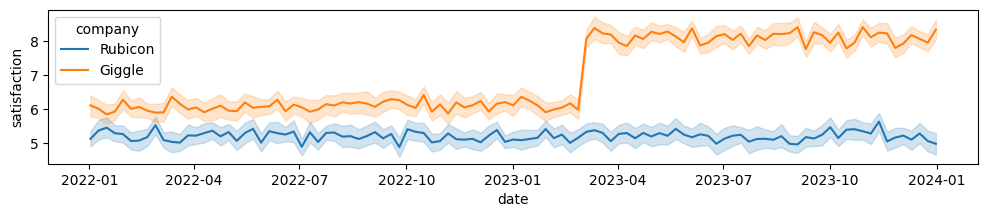

In [10]:
# confirm the change
plt.figure(figsize=(12,2))
sns.lineplot(data=march_onset_df, x="date", y="satisfaction", hue="company")

## 2.2 Question 1
**Instruction:** Simulate a dataset in which **remote work was assosciated with a decrease in employee satisfaction**. Illustrate clearly that your manipulation to the dataset has worked.

In [55]:
negative_parameters = default_simulation_parameters.copy()
negative_parameters['remote_work_treatment_effect'] = -2
negative_df = simulate_data(negative_parameters)

<Axes: xlabel='date', ylabel='satisfaction'>

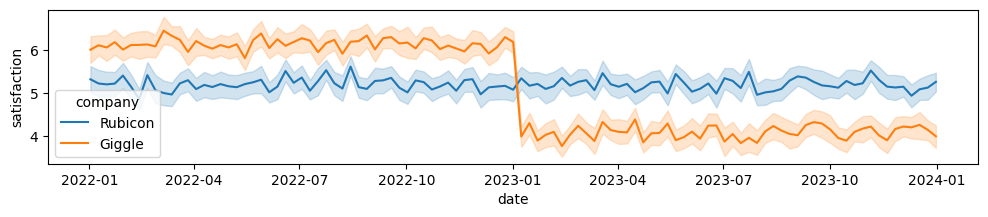

In [56]:
plt.figure(figsize=(12,2))
sns.lineplot(data=negative_df, x="date", y="satisfaction", hue="company")

## 2.3 Question 2
**Instruction:** Simulate a dataset in which **remote work begun much sooner after the data collection start date**. Illustrate clearly that your manipulation to the dataset has worked.

In [51]:
sooner_parameters = default_simulation_parameters.copy()
sooner_parameters['remote_work_onset_date'] = pd.to_datetime("2022-03-01")
sooner_df = simulate_data(sooner_parameters)

<Axes: xlabel='date', ylabel='satisfaction'>

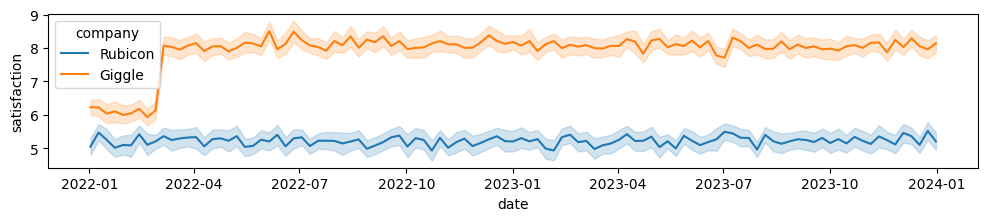

In [52]:
plt.figure(figsize=(12,2))
sns.lineplot(data=sooner_df, x="date", y="satisfaction", hue="company")

---

# **Section 3** Regression analyses

## 3.1 Question 3
**Instruction:** Using `statsmodels`, perform a regression analysis on a dataset simulated with the **default parameters**. Your regression analysis should examine whether an employee's age predicts their satisfaction levels. Explain how the results of your analysis support your conclusion.  

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
def age_model():
    df = df_default

    formula = 'satisfaction ~ employee_age'
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

age_model()

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4724
Date:                Sat, 28 Sep 2024   Prob (F-statistic):              0.492
Time:                        20:42:45   Log-Likelihood:                -19464.
No. Observations:               10500   AIC:                         3.893e+04
Df Residuals:                   10498   BIC:                         3.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1882      0.051    122.373   

## 3.2 Question 4
**Instruction:** 

1. Simulate a dataset using the default parameters.
2. Using `statsmodels`, perform a regression analysis with one dependent variable (`satisfaction`) and one predictor (`time_at_company`) to **examine whether employees who have been working longer are happier**.

What does your regression result show? Is the result accurate? Explain how the results of your analysis support the conclusion and any limitations of the analysis.  

In [41]:
def time_model():
    df = df_default

    formula = 'satisfaction ~ time_at_company'
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

time_model()

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     874.9
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          9.26e-185
Time:                        20:42:33   Log-Likelihood:                -19044.
No. Observations:               10500   AIC:                         3.809e+04
Df Residuals:                   10498   BIC:                         3.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.4179      0.029    1

---

# **Section 4** Difference in Differences analyses

## 4.1 Question 5
**Instruction:** 

1. Simulate a dataset in which remote work has a strong negative effect on employee satisfaction.
2. Using `statsmodels`, perform a Difference in Differences analysis to **examine the effect of remote work on satisfaction**.

What does your regression result show? Is the result accurate? Explain how the results of your analysis support the conclusion.

In [64]:
def did_model(dataframe):
    df = dataframe

    df['post_treatment'] = (df['date'] > negative_parameters["remote_work_onset_date"]).astype(int)
    df['treatment_group'] = (df['company'] == 'Giggle').astype(int)
    formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

did_model(negative_df)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:27:03   Log-Likelihood:                -14964.
No. Observations:               10500   AIC:                         2.994e+04
Df Residuals:                   10496   BIC:                         2.996e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

*The result is accurate (b=-2.0567) and significant (p=0.000), represents a negative effect of remote working on satisfaction, which supports my hypothesis.*

## 4.2 Question 6
**Instruction:** Use data simulation and DiD analyses to examine **whether the DiD analysis is robust to variations in the dataset**, such as the size of the dataset, the strength of the treatment effect, and the difference in baseline levels of satisfaction between the two companies. 

You do **not** need to analyze all of these factors, but your analyses should **examine how at least one variable has an impact on the capacity of the DiD analysis to accurately detect the true effect of the remote work intervention**.  

This question is your opportunity to exhibit creativity and exploration. Be sure to explain your choices and your analyses using Markdown cells. End with a brief written conclusion.

In [65]:
less_variance_parameters = default_simulation_parameters.copy()
less_variance_parameters['satisfaction_variance'] = 0.5
df_less_varaince = simulate_data(less_variance_parameters)

did_model(df_less_varaince)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.956e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:27:34   Log-Likelihood:                -7600.4
No. Observations:               10500   AIC:                         1.521e+04
Df Residuals:                   10496   BIC:                         1.524e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [77]:
more_variance10_parameters = default_simulation_parameters.copy()
more_variance10_parameters['satisfaction_variance'] = 10
df_more_varaince10 = simulate_data(more_variance10_parameters)

did_model(df_more_varaince10)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     48.68
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           3.09e-31
Time:                        21:30:37   Log-Likelihood:                -39005.
No. Observations:               10500   AIC:                         7.802e+04
Df Residuals:                   10496   BIC:                         7.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [75]:
more_variance20_parameters = default_simulation_parameters.copy()
more_variance20_parameters['satisfaction_variance'] = 20
df_more_varaince20 = simulate_data(more_variance20_parameters)

did_model(df_more_varaince20)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.33
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           4.77e-08
Time:                        21:30:25   Log-Likelihood:                -46442.
No. Observations:               10500   AIC:                         9.289e+04
Df Residuals:                   10496   BIC:                         9.292e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [78]:
new_satisfaction_parameters = default_simulation_parameters.copy()
new_satisfaction_parameters['satisfaction_levels'] = {"Rubicon": 10.4, "Giggle": 12.2}
df_new_satisfaction = simulate_data(new_satisfaction_parameters)

did_model(df_new_satisfaction)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     8465.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:55:41   Log-Likelihood:                -14952.
No. Observations:               10500   AIC:                         2.991e+04
Df Residuals:                   10496   BIC:                         2.994e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### **Conclusion to Q6**

*I would like to change the satisfaction variance (the standard deviation of satisfaction) to test the robustness of DiD model.
According to the regression results, the DiD model appears robust to variations in the standard deviation of satisfaction. When the variance becomes smaller, the coefficient of interaction increases and the p value decreases; when the varaince becomes larger, the coefficient of interaction decreases and the p value increases - which means it becomes less significant. However, even under condition of high standard deviation which is 10 times to the original varaince, the treatment effect is still significant. Therefore, we can concludes that the DiD model is robust.*

However, according to the 'new_satisfaction_parameters' test, the basic satisfaction levels have no effect on the result of DiD model. DiD will only measures the treatment, instead of the basic level differences.

---

# **Section 5** Use of External Resources
Please indicate here your use of external resources such as coding assitants or other AI systems to aid in completing this assignment. Please select one of the options below by placing an `[x]` next to the relevant option. You may also include any additional notes that may help gradeers assess your reliance on external resources. 

## No Usage
`[x]` I attest that I did not use a coding assistant such as ChatGPT or other large language models to complete this assignment.

## Declared Usage
`[]` I made use of a coding assistant such as ChatGPT or other large language models to complete this assignment.

If you select this option, you are required to include a record of your interaction with the coding assistant here. Please include in the cell below either a link to the transcript or the transcript itself. If you provide a link, it is your responsibility to ensure that the link works and can be accessed by the graders. 

### Transcript
**Assistant transcript or link to transcript goes here**

### Additional Notes
**I used notebook-3 and notebook-4 finishing this assignment.**

---

# **Section 6** Feedback and Reflection (optional)
Here is a space to include any feedback or reflections on this assignment and/or areas in which you feel strong or feel the need to learn more. 